In [1]:
stt_pecha_tools = "01_stt_pecha_tools.tsv"
prodigy = "02_prodigy.tsv"
mv = "03_mv_saymore.tsv"

In [2]:
import pandas as pd
pecha_tools_df = pd.read_csv(stt_pecha_tools, sep='\t')
prodigy_df = pd.read_csv(prodigy, sep='\t')
mv_df = pd.read_csv(mv, sep='\t')

In [3]:
df = pd.concat([pecha_tools_df, prodigy_df, mv_df], ignore_index=True)

In [4]:
df = df[df['file_name'] != 'STT_TT00031_03471.850-03477.44ེ་བསམ་ནས་དྲན་སོང་།']

In [5]:
df.drop_duplicates(subset='file_name', keep="first", inplace=True)

# clean the combined tsv

In [6]:
import re
def clean_transcription(text):
    text = text.replace('\n', ' ')
    text = text.replace('\t', ' ')
    text = text.strip()

    text = re.sub(r"་+", "་", text)
    text = re.sub(r"།+", "།", text)
    text = re.sub(r"\s+", " ", text)
    text = re.sub(r"\s+།", "།", text)

    text = re.sub(r"ཧཧཧ+", "ཧཧཧ", text)
    text = re.sub(r'འེ་འེ་(འེ་)+', r'འེ་འེ་འེ་', text)
    text = re.sub(r'ཧ་ཧ་(ཧ་)+', r'ཧ་ཧ་ཧ་', text)

    chars_to_ignore_regex = '[\,\?\.\!\-\;\:\"\“\%\‘\”\�\/\{\}\(\)\༽\》\༼\《\༅\༄\༈\༑\༠]'
    
    text = re.sub(chars_to_ignore_regex, '', text)+" "
    return text

def check_if_regex(text):
    text = str(text)
    regex = re.compile(r'[a-zA-Z]+')
    match = re.search(regex, text)
    
    return bool(match)
    
print(check_if_regex('ཧཧ'))
print(check_if_regex('some text'))

False
True


In [7]:
df = df[df['uni'].str.len() > 0]

In [8]:
df = df[~df['uni'].apply(check_if_regex)]

In [9]:
df['uni'] = df['uni'].map(clean_transcription)

In [10]:
import pyewts

converter = pyewts.pyewts()

df['wylie'] = df['uni'].apply(converter.toWylie)

In [11]:
df['char_len'] = df['uni'].str.len()

<Axes: >

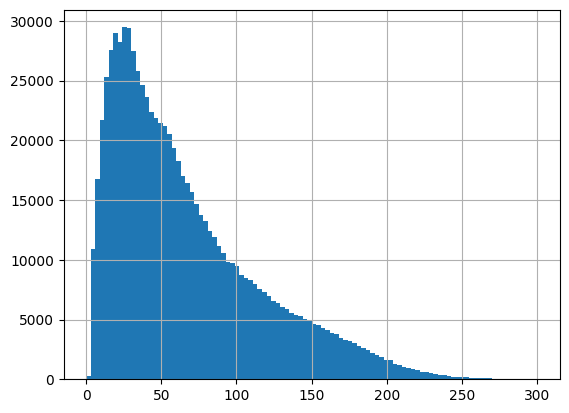

In [12]:
df['char_len'].hist(bins=100, range=(0, 300))

In [13]:
df['char_len'].describe()

count    803806.000000
mean         66.223094
std          60.774279
min           1.000000
25%          28.000000
50%          53.000000
75%          93.000000
max       23249.000000
Name: char_len, dtype: float64

In [14]:
df.shape[0]

803806

In [15]:
upper_cutoff = 400
lower_cutoff = 5

In [16]:
df[df['char_len'] > upper_cutoff].shape[0], df[df['char_len'] < lower_cutoff].shape[0]

(3, 7766)

In [17]:
df[df['char_len'] > upper_cutoff][['uni', 'url', 'char_len']].sort_values(by='char_len').to_csv('04_longer_than_upper_cutoff.tsv', sep='\t', index=False)

In [18]:
df[df['char_len'] < lower_cutoff][['uni', 'url', 'char_len']].sort_values(by='char_len').to_csv('04_shorter_than_lower_cutoff.tsv', sep='\t', index=False)

In [19]:
df = df[(df['char_len'] < upper_cutoff) & (df['char_len'] > lower_cutoff)]

In [20]:
df.shape[0]

792621

In [21]:
def getTimeSpan(filename):

    filename = filename.replace(".wav", "")
    filename = filename.replace(".WAV", "")
    filename = filename.replace(".mp3", "")
    filename = filename.replace(".MP3", "")
    try:
        if "_to_" in filename:
            start, end = filename.split("_to_")
            start = start.split("_")[-1]
            end = end.split("_")[0]
            end = float(end)
            start = float(start)
            return abs(end - start)/1000
        else:
            start, end = filename.split("-")
            start = start.split("_")[-1]
            end = end.split("_")[0]
            end =   float(end)
            start = float(start)
            return abs(end - start)
    except Exception as err:
        print(f"filename is:'{filename}'. Could not parse to get time span.")
        return 0
    

getTimeSpan("STT_TT00031_03471.850-03477.44")

5.5900000000001455

In [22]:
df['audio_len'] = df['file_name'].apply(getTimeSpan)

In [23]:
df['audio_len'].describe()

count    792621.000000
mean          4.235826
std           3.018323
min           0.400000
25%           1.650000
50%           3.232000
75%           6.733000
max          14.050000
Name: audio_len, dtype: float64

<Axes: >

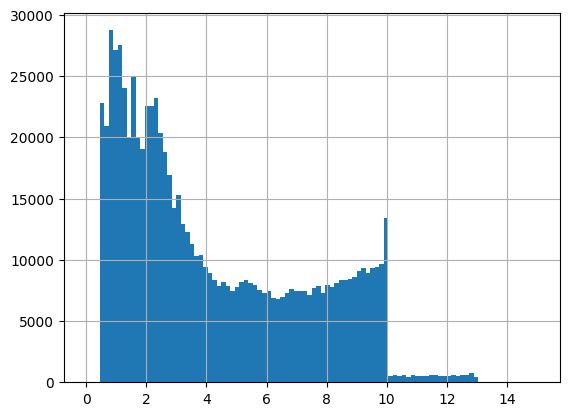

In [24]:
df['audio_len'].hist(bins=100, range=(0, 15))

In [25]:
df['url'] = df['url'].map(lambda x : x.replace('#','%23'))

In [27]:
df.to_csv('04_combine_all.tsv', sep='\t', index=False)

In [28]:
df.groupby('grade').size()

grade
2    441439
3    351182
dtype: int64

In [29]:
# from sklearn.model_selection import train_test_split

# # Splitting the data
# train, test_temp = train_test_split(df, test_size=0.1, random_state=42, stratify=df['dept'])
# val, test = train_test_split(test_temp, test_size=0.5, random_state=42, stratify=test_temp['dept'])         

In [30]:
# len(train), len(val), len(test), len(train)+len(val)+len(test), len(df)

In [31]:
# train.to_csv('train.tsv', sep='\t', index=False)
# val.to_csv(  'val.tsv', sep='\t', index=False)
# test.to_csv( 'test.tsv', sep='\t', index=False)

In [32]:
df['uni'].str.contains('ཧཧཧ').value_counts()

uni
False    792110
True        511
Name: count, dtype: int64

In [33]:
import pandas as pd

df = pd.read_csv('04_combine_all.tsv', sep='\t')

In [34]:
df.head()

,file_name,uni,url,dept,grade,wylie,char_len,audio_len
0,STT_NS0085_0150_1184970_to_1192294.mp3,རྒྱ་གར་ལུང་པར་དང་ཤོས་སླེབས་དུས་སྐབས་སུ་དངོས་གན...,https://d38pmlk0v88drf.cloudfront.net/stt_pech...,STT_NS,2,rgya gar lung par dang shos slebs dus skabs su...,165,7.324
1,STT_CS-L-2018_2018-M_M-D_D-B04_B04-1_1-R_R-02_...,རྒན་ལགས་ལབ་ཡི་ཡིན་ད་ང་། འདི་ལ་རྨ་བཟོས་ཡོད་ད། ཚ...,https://d38pmlk0v88drf.cloudfront.net/stt_pech...,STT_CS,2,rgan lags lab yi yin da nga /_'di la rma bzos ...,80,5.554
2,STT_AB00156_0296_1211329_to_1212494,བོད་གཞུང་བཀའ་ཤག་དང༌,https://huggingface.co/datasets/openpecha/STT_...,STT_AB,2,bod gzhung bka' shag dang*_,20,1.165
3,STT_NS_M0049_0127_838881_to_840990.mp3,ད་དེང་སང་མི་འདུག་མངར་མོ་འདྲ་བོ་ཚོར་གི་འདུག ང་འ...,https://d38pmlk0v88drf.cloudfront.net/stt_pech...,STT_NS,2,da deng sang mi 'dug mngar mo 'dra bo tshor gi...,53,2.109
4,STT_NS_M0035_0143_1065338_to_1073027.mp3,འདི་སློབ་སྦྱོང་ཡོད་མྱི་བུ་གུ་གཅིག་ཡིན་ན། འདི་འ...,https://d38pmlk0v88drf.cloudfront.net/stt_pech...,STT_NS,2,'di slob sbyong yod myi bu gu gcig yin na/_'di...,143,7.689


In [35]:
df['audio_len'] = df['file_name'].map(getTimeSpan)

In [36]:
df.groupby('dept')['audio_len'].sum()/60/60

dept
STT_AB     97.767446
STT_CS     76.521353
STT_MV    410.710358
STT_NS    127.994143
STT_TT    219.619146
Name: audio_len, dtype: float64

In [37]:
df['audio_len'].sum()/60/60

932.6124455555554

In [38]:
# df.sort_values(by='audio_len', ascending=False, inplace=True)
df = df.sample(frac = 1)

In [39]:
df.iloc[0:100,[0, 1, 3, 5]].to_csv("04_random_100.tsv", index=False, sep='\t')
df.iloc[0:100,[0, 1, 3, 5]].head()

,file_name,uni,dept,wylie
459153,STT_AB00160_0581_1591523_to_1594189,དེང་དུས་འཛམ་གླིང་གི་གནས་ལུགས་རྣམས་རྟོགས་ཆེད་,STT_AB,deng dus 'dzam gling gi gnas lugs rnams rtogs ...
227436,STT_TT00358_326.100-330.700,ད་ཨོ་ན་ཉོན་མོངས་པའི་ང་རྒྱལ་དེ་ལ་ཉེས་དམིགས་ག་རེ...,STT_TT,da o na nyon mongs pa'i nga rgyal de la nyes d...
766809,STT_MV0612_0011_201472_to_203607.wav,ག་རེ་འདུག་ སོན་མང་པོ་འདི་འདྲས་འདུག་གེ།,STT_MV,ga re 'dug _son mang po 'di 'dras 'dug ge/_
54221,STT_AB00240_0162_1261723_to_1269087,བརྟེན་བྱས་ཐག་པའི་ཕྱུ་པ་དང་དེ་མིན་རྒྱན་ཆ་རྒྱ་རྒ...,STT_AB,brten byas thag pa'i phyu pa dang de min rgyan...
505489,STT_TT00140_00247.200-00250.850,མཚམས་མཚམས་ལྟོ་ཟ་ཐེངས་རེ་རྩིས་རེ་རྩིས་རེད། དེ་འ...,STT_TT,mtshams mtshams lto za thengs re rtsis re rtsi...


In [40]:
df[df['grade'] == 3].groupby('dept').size()

dept
STT_AB       147
STT_CS     37376
STT_NS     42587
STT_TT    271072
dtype: int64